In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 128 #每一轮训练的batch大小
num_classes = 10 #类型数量
epochs = 12 #训练轮次数

img_rows, img_cols = 28, 28 #MNIST数据集图像大小28*28

(x_train, y_train), (x_test, y_test) = mnist.load_data() #载入数据集，数组是三维的
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
# reshape
if K.image_data_format() == 'channels_first': #查看环境下的image_data_format()值是'channels_first'还是'channels_last'
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) #按照Keras要求把数据集转化为加入通道数的四位
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) #黑白图像，channel数为1
    input_shape = (img_rows, img_cols, 1)
x_train.shape

(60000, 28, 28, 1)

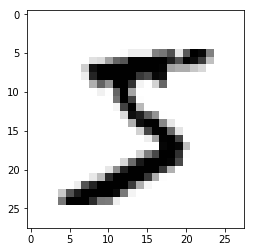

In [5]:
fig = plt.figure()
plt.imshow(x_train[0, :, :, 0],cmap = 'binary')#黑白显示
plt.show()

In [6]:
x_train = x_train.astype('float32') #按照Keras要求把数据集由整形转化为浮点型
x_test = x_test.astype('float32')
x_train /= 255 #像素值除以255，转化为小数，加速收敛
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
y_train[0]

5

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes) # 将label进行one-hot编码
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), 
                 padding='valid', 
                 input_shape=input_shape, 
                 activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), 
                 padding='valid', 
                 activation='tanh')) #双曲正切函数作激活函数 tanhx = (e^x-e^-x)/(e^x+e^-x)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax')) #softmax函数做激活函数 e^x/(sum(e^x))

sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True) #采用随机梯度下降法作为优化算法
model.compile(optimizer=sgd, 
              loss='categorical_crossentropy', #多分类的对数损失函数 -logP(Y|X)
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split = 0.2,
          shuffle=True) #训练数据会被随即打乱

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 6s 130us/step - loss: 0.2031 - acc: 0.9398 - val_loss: 0.0815 - val_acc: 0.9768
Epoch 2/12
48000/48000 [==============================] - 4s 89us/step - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0570 - val_acc: 0.9831
Epoch 3/12
48000/48000 [==============================] - 4s 86us/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0490 - val_acc: 0.9858
Epoch 4/12
48000/48000 [==============================] - 4s 88us/step - loss: 0.0297 - acc: 0.9909 - val_loss: 0.0517 - val_acc: 0.9843
Epoch 5/12
48000/48000 [==============================] - 4s 88us/step - loss: 0.0220 - acc: 0.9935 - val_loss: 0.0449 - val_acc: 0.9864
Epoch 6/12
48000/48000 [==============================] - 4s 87us/step - loss: 0.0164 - acc: 0.9950 - val_loss: 0.0558 - val_acc: 0.9835
Epoch 7/12
48000/48000 [==============================] - 4s 86us/step - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0497 - val_ac

In [12]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.013026060899986865
Test accuracy: 0.9966666666666667


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.040405174139036534
Test accuracy: 0.9885
